In [1]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import logging
import cartopy.crs as ccrs
import metpy  # accessor needed to parse crs
import calendar
import argparse
import seaborn as sns
from shapely.geometry import Point
import geopandas
from geodatasets import get_path
import glob
import fnmatch
import os

In [2]:
output_col_names = ['lon'
,'lat'
,'variable'
,'cohort_number'
,'stand_age'
,'potential_veg'
,'current_veg'
,'subtype'
,'community_type'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']

In [46]:
##### NPP
CanESM5 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/CanESM5_ssp245/var_out/NPP.csv0'
,names = output_col_names)
MIROC6 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MIROC6_ssp245/var_out/NPP.csv0'
,names = output_col_names)
MPIxxESM1xx2xxLR = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MPIxxESM1xx2xxLR_ssp245/var_out/NPP.csv0'
,names = output_col_names)
MRIxxESM2xx0 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MRIxxESM2xx0_ssp245/var_out/NPP.csv0'
,names = output_col_names)
MPIxxESM1xx2xxHR = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MPIxxESM1xx2xxHR_ssp245/var_out/NPP.csv0'
,names = output_col_names)

# ##### FCO2
# CanESM5 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/CanESM5_ssp245/var_out/FCO2.csv0'
# ,names = output_col_names)
# MIROC6 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MIROC6_ssp245/var_out/FCO2.csv0'
# ,names = output_col_names)
# MPIxxESM1xx2xxLR = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MPIxxESM1xx2xxLR_ssp245/var_out/FCO2.csv0'
# ,names = output_col_names)
# MRIxxESM2xx0 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MRIxxESM2xx0_ssp245/var_out/FCO2.csv0'
# ,names = output_col_names)
# MPIxxESM1xx2xxHR = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MPIxxESM1xx2xxHR_ssp245/var_out/FCO2.csv0'
# ,names = output_col_names)

# ##### FH2O
# CanESM5 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/CanESM5_ssp245/var_out/FH2O.csv0'
# ,names = output_col_names)
# MIROC6 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MIROC6_ssp245/var_out/FH2O.csv0'
# ,names = output_col_names)
# MPIxxESM1xx2xxLR = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MPIxxESM1xx2xxLR_ssp245/var_out/FH2O.csv0'
# ,names = output_col_names)
# MRIxxESM2xx0 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MRIxxESM2xx0_ssp245/var_out/FH2O.csv0'
# ,names = output_col_names)
# MPIxxESM1xx2xxHR = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MPIxxESM1xx2xxHR_ssp245/var_out/FH2O.csv0'
# ,names = output_col_names)

# ##### FRDL
# CanESM5 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/CanESM5_ssp245/var_out/FRDL.csv0'
# ,names = output_col_names)
# MIROC6 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MIROC6_ssp245/var_out/FRDL.csv0'
# ,names = output_col_names)
# MPIxxESM1xx2xxLR = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MPIxxESM1xx2xxLR_ssp245/var_out/FRDL.csv0'
# ,names = output_col_names)
# MRIxxESM2xx0 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MRIxxESM2xx0_ssp245/var_out/FRDL.csv0'
# ,names = output_col_names)
# MPIxxESM1xx2xxHR = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MPIxxESM1xx2xxHR_ssp245/var_out/FRDL.csv0'
# ,names = output_col_names)

# ##### TEMP
# CanESM5 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/CanESM5_ssp245/var_out/TEMP.csv0'
# ,names = output_col_names)
# MIROC6 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MIROC6_ssp245/var_out/TEMP.csv0'
# ,names = output_col_names)
# MPIxxESM1xx2xxLR = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MPIxxESM1xx2xxLR_ssp245/var_out/TEMP.csv0'
# ,names = output_col_names)
# MRIxxESM2xx0 = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MRIxxESM2xx0_ssp245/var_out/TEMP.csv0'
# ,names = output_col_names)
# MPIxxESM1xx2xxHR = pd.read_csv('~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/MPIxxESM1xx2xxHR_ssp245/var_out/TEMP.csv0'
# ,names = output_col_names)

In [14]:
CanESM5.current_veg.unique()

array([16, 51, 50])

In [48]:
CanESM5 = CanESM5.loc[CanESM5['current_veg']==16, ['cohort_number', 'year', 'cohort_area', 'monthly_mean']]
CanESM5['model'] = 'CanESM5'
CanESM5_primary = CanESM5.loc[CanESM5['cohort_number'] == 1]

CanESM5['temp'] = CanESM5['cohort_area'] * CanESM5['monthly_mean']

CanESM5_sum=CanESM5.groupby(['model', 'year'])[['cohort_area', 'temp']].sum().reset_index()

CanESM5_sum['monthly_mean'] = CanESM5_sum['temp']/ CanESM5_sum['cohort_area']

MIROC6 = MIROC6.loc[MIROC6['current_veg']==16, ['cohort_number', 'year', 'cohort_area', 'monthly_mean']]
MIROC6['model'] = 'MIROC6'
MIROC6_primary = MIROC6.loc[MIROC6['cohort_number'] == 1]

MIROC6['temp'] = MIROC6['cohort_area'] * MIROC6['monthly_mean']

MIROC6_sum=MIROC6.groupby(['model', 'year'])[['cohort_area', 'temp']].sum().reset_index()

MIROC6_sum['monthly_mean'] = MIROC6_sum['temp']/ MIROC6_sum['cohort_area']

MPIxxESM1xx2xxLR = MPIxxESM1xx2xxLR.loc[MPIxxESM1xx2xxLR['current_veg']==16, ['cohort_number', 'year', 'cohort_area', 'monthly_mean']]
MPIxxESM1xx2xxLR['model'] = 'MPIxxESM1xx2xxLR'
MPIxxESM1xx2xxLR_primary = MPIxxESM1xx2xxLR.loc[MPIxxESM1xx2xxLR['cohort_number'] == 1]

MPIxxESM1xx2xxLR['temp'] = MPIxxESM1xx2xxLR['cohort_area'] * MPIxxESM1xx2xxLR['monthly_mean']

MPIxxESM1xx2xxLR_sum=MPIxxESM1xx2xxLR.groupby(['model', 'year'])[['cohort_area', 'temp']].sum().reset_index()

MPIxxESM1xx2xxLR_sum['monthly_mean'] = MPIxxESM1xx2xxLR_sum['temp']/ MPIxxESM1xx2xxLR_sum['cohort_area']

MRIxxESM2xx0 = MRIxxESM2xx0.loc[MRIxxESM2xx0['current_veg']==16, ['cohort_number', 'year', 'cohort_area', 'monthly_mean']]
MRIxxESM2xx0['model'] = 'MRIxxESM2xx0'
MRIxxESM2xx0_primary = MRIxxESM2xx0.loc[MRIxxESM2xx0['cohort_number'] == 1]

MRIxxESM2xx0['temp'] = MRIxxESM2xx0['cohort_area'] * MRIxxESM2xx0['monthly_mean']

MRIxxESM2xx0_sum=MRIxxESM2xx0.groupby(['model', 'year'])[['cohort_area', 'temp']].sum().reset_index()

MRIxxESM2xx0_sum['monthly_mean'] = MRIxxESM2xx0_sum['temp']/ MRIxxESM2xx0_sum['cohort_area']

MPIxxESM1xx2xxHR = MPIxxESM1xx2xxHR.loc[MPIxxESM1xx2xxHR['current_veg']==16, ['cohort_number', 'year', 'cohort_area', 'monthly_mean']]
MPIxxESM1xx2xxHR['model'] = 'MPIxxESM1xx2xxHR'
MPIxxESM1xx2xxHR_primary = MPIxxESM1xx2xxHR.loc[MPIxxESM1xx2xxHR['cohort_number'] == 1]

MPIxxESM1xx2xxHR['temp'] = MPIxxESM1xx2xxHR['cohort_area'] * MPIxxESM1xx2xxHR['monthly_mean']

MPIxxESM1xx2xxHR_sum=MPIxxESM1xx2xxHR.groupby(['model', 'year'])[['cohort_area', 'temp']].sum().reset_index()

MPIxxESM1xx2xxHR_sum['monthly_mean'] = MPIxxESM1xx2xxHR_sum['temp']/ MPIxxESM1xx2xxHR_sum['cohort_area']


KeyError: 'current_veg'

In [49]:
all_models = pd.concat(
[CanESM5_sum
,MPIxxESM1xx2xxLR_sum
,MRIxxESM2xx0_sum
,MPIxxESM1xx2xxHR_sum
,MIROC6_sum]
    ,axis = 0
)
all_models = all_models.reset_index()

In [50]:
all_models_primary = pd.concat(
[CanESM5_primary
,MPIxxESM1xx2xxLR_primary
,MRIxxESM2xx0_primary
,MPIxxESM1xx2xxHR_primary
,MIROC6_primary]
    ,axis = 0
)
all_models_primary = all_models_primary.reset_index()

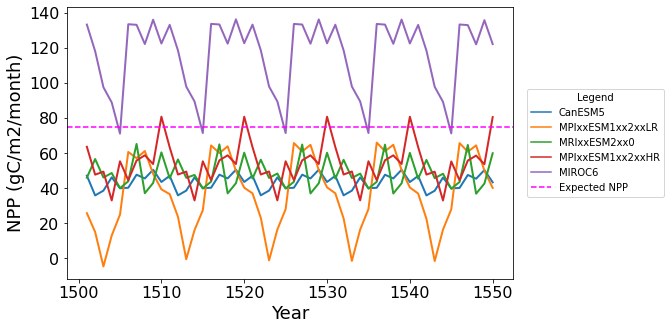

In [56]:
fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x='year', y='monthly_mean', hue='model', linewidth = 2
             , data=all_models.loc[all_models['year'].between(1500, 1550)])

# Increase the figure size
# plt.figure(figsize=(10, 6))
plt.axhline(y=75, color='magenta', linestyle='--', label='Expected NPP')

# Move the legend outside of the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Year', fontsize = 18)
ax.set_ylabel('NPP (gC/m2/month)', fontsize = 18)
# ax.set_ylim(282,294)
legend = ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), title='Legend')
ax.tick_params(axis='both', labelsize=16)

# Show the plot
# plt.show()

In [ ]:
all_models.loc[all_models['year'].between(1984, 2014)]

In [25]:
pd.concat(
[CanESM5_sum
,
MIROC6_sum]
    ,axis = 0
)

,model,year,cohort_area,temp,annual_sum
0,CanESM5,1501,3081,1745386.5,566.5
1,CanESM5,1502,3081,1328527.2,566.5
2,CanESM5,1503,3081,1429892.1,431.2
3,CanESM5,1504,3081,1709646.9,431.2
4,CanESM5,1505,3081,1480112.4,464.1
...,...,...,...,...,...
509,MIROC6,2010,3073,4338697.3,839.7
510,MIROC6,2011,3074,5052481.7,1573.0
511,MIROC6,2012,3074,4274428.8,1573.0
512,MIROC6,2013,3074,-237832.0,1569.7


In [17]:
CanESM5_primary

,cohort_number,year,cohort_area,annual_sum,model
0,1,1501,3078,566.5,CanESM5
2,1,1502,3078,431.2,CanESM5
4,1,1503,3078,464.1,CanESM5
6,1,1504,3078,554.9,CanESM5
8,1,1505,3078,480.4,CanESM5
...,...,...,...,...,...
4235,1,2010,2991,302.5,CanESM5
4315,1,2011,2989,643.8,CanESM5
4396,1,2012,2987,652.0,CanESM5
4478,1,2013,2986,507.6,CanESM5


In [4]:
FCO2 = pd.read_csv("~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/var_out/FCO2.csv0",
names = output_col_names)
FH2O = pd.read_csv("~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/var_out/FH2O.csv0",
names = output_col_names)
FO3 = pd.read_csv("~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/var_out/FO3.csv0",
names = output_col_names)
FRDL = pd.read_csv("~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/var_out/FRDL.csv0",
names = output_col_names)
GPP = pd.read_csv("~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/var_out/GPP.csv0",
names = output_col_names)
NPP = pd.read_csv("~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/var_out/NPP.csv0",
names = output_col_names)
SOILORGC = pd.read_csv("~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/var_out/SOILORGC.csv0",
names = output_col_names)
TEMP = pd.read_csv("~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/var_out/TEMP.csv0",
names = output_col_names)
VEGC = pd.read_csv("~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/var_out/VEGC.csv0",
names = output_col_names)
VEGINGPP = pd.read_csv("~/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/var_out/VEGINGPP.csv0",
names = output_col_names)


<Axes: xlabel='year'>

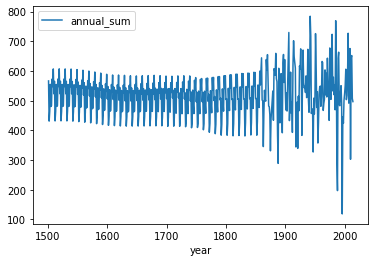

In [6]:
NPP.loc[NPP['cohort_number'] == 1].plot(x = 'year', y = 'annual_sum')

<Axes: xlabel='year'>

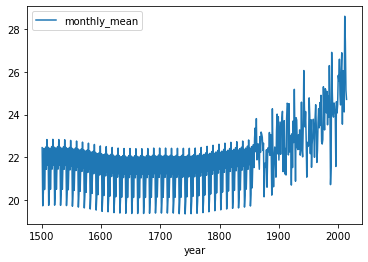

In [7]:
FCO2.loc[FCO2['cohort_number'] == 1].plot(x = 'year', y = 'monthly_mean')

In [10]:
FCO2.loc[0]

lon                     -62.0
lat                       4.0
variable                FCO2 
cohort_number               1
stand_age                3000
potential_veg              16
current_veg                16
subtype                    16
community_type             10
silt_clay               39.88
lc_state                    1
land_area                3082
cohort_area              3078
year                     1501
annual_sum              269.4
monthly_maximum          30.9
monthly_mean            22.45
monthly_minimum           9.3
Jan                     15.66
Feb                     12.28
Mar                      9.35
Apr                     12.97
May                     26.38
Jun                     30.94
Jul                     30.43
Aug                     29.82
Sep                     29.36
Oct                      27.9
Nov                     22.86
Dec                     21.51
region              Venezuela
Name: 0, dtype: object

In [ ]:
FH2O.loc[FH2O['cohort_number'] == 1].plot(x = 'year', y = 'monthly_mean')
##multiply all the factors together 

<Axes: xlabel='year'>

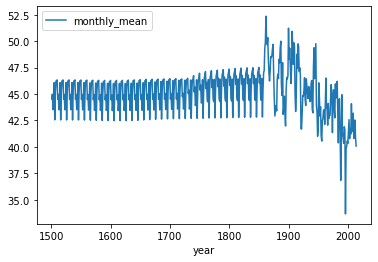

In [9]:
FH2O.loc[(FH2O['cohort_number'] == 1) & ()].plot(x = 'year', y = 'monthly_mean')
##multiply all the factors together 

<Axes: xlabel='year'>

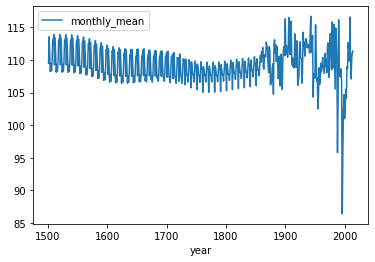

In [11]:
FRDL.loc[FRDL['cohort_number'] == 1].plot(x = 'year', y = 'monthly_mean')

<Axes: xlabel='year'>

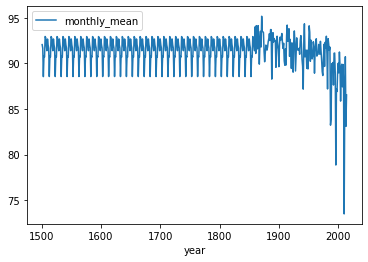

In [12]:
TEMP.loc[TEMP['cohort_number'] == 1].plot(x = 'year', y = 'monthly_mean')

<Axes: xlabel='year'>

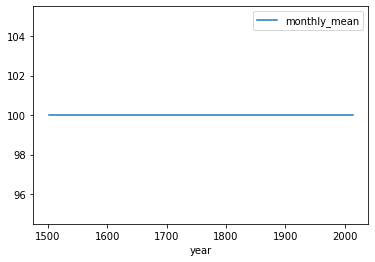

In [13]:
FO3.loc[FO3['cohort_number'] == 1].plot(x = 'year', y = 'monthly_mean')

<Axes: xlabel='year'>

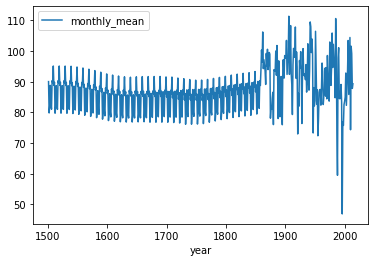

In [14]:
VEGINGPP.loc[VEGINGPP['cohort_number'] == 1].plot(x = 'year', y = 'monthly_mean')



In [21]:
tt = VEGINGPP[['lon', 'lat', 'year', 'cohort_number', 'monthly_mean']
        ].merge(GPP[['lon', 'lat', 'year', 'cohort_number', 'monthly_mean']],
                on = ['lon', 'lat', 'year', 'cohort_number']
               )

tt['ratio'] = tt['monthly_mean_y']/tt['monthly_mean_x']

<Axes: xlabel='year'>

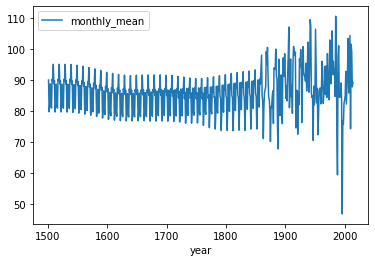

In [15]:
GPP.loc[GPP['cohort_number'] == 1].plot(x = 'year', y = 'monthly_mean')

<Axes: xlabel='year'>

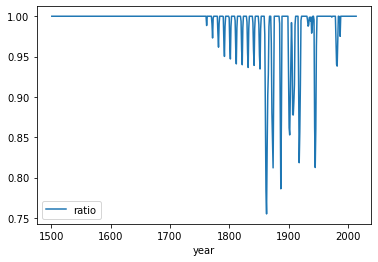

In [22]:
tt.loc[tt['cohort_number'] == 1].plot(x = 'year', y = 'ratio')

In [3]:
amazon_soil = pd.read_csv('~/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_SOILORGC16289.csv')
amazon_veg = pd.read_csv('~/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_VEGC16289.csv')
amazon_gpp = pd.read_csv('~/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_GPP16289.csv')
amazon_npp = pd.read_csv('~/TEM_output_processed/historical_run/forest_lon_lat_pfts/forests_NPP16289.csv')

In [2]:
amazon_soil.loc[0]

NameError: name 'amazon_soil' is not defined

<Axes: xlabel='year'>

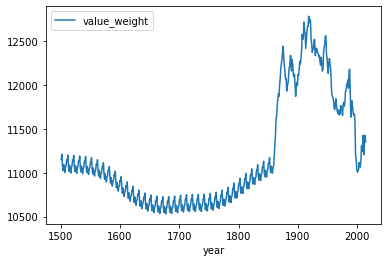

In [14]:
amazon_veg.loc[(amazon_veg['lon']==-62) & (amazon_veg['lat']==4)& 
               (amazon_veg['month']=='Jan')&(amazon_veg['stand_age_interval_min']==3000)].plot(x = 'year', y = 'value_weight')

<Axes: xlabel='year'>

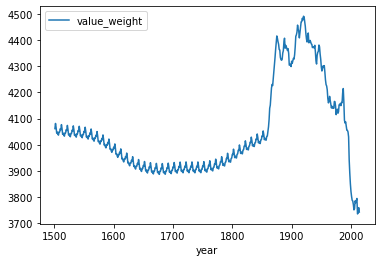

In [22]:
amazon_soil.loc[(amazon_soil['lon']==-62) & (amazon_soil['lat']==4)& (amazon_soil['month']=='Jan')&(amazon_soil['stand_age_interval_min']==3000)
               &amazon_soil['year'].between(1830, 1880)].plot(x = 'year', y = 'value_weight')




<Axes: xlabel='year'>

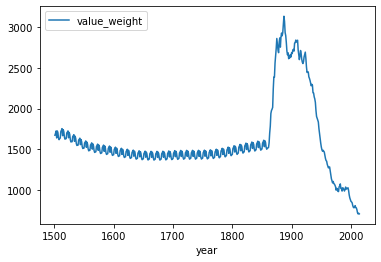

In [16]:
amazon_veg.loc[(amazon_veg['lon']==-62) & (amazon_veg['lat']==0.5)& (amazon_veg['month']=='Jan')&(amazon_veg['stand_age_interval_min']==3000)].plot(x = 'year', y = 'value_weight')


#what happens if I start the model at 1850?
#keep all variables constant besides 1

<Axes: xlabel='year'>

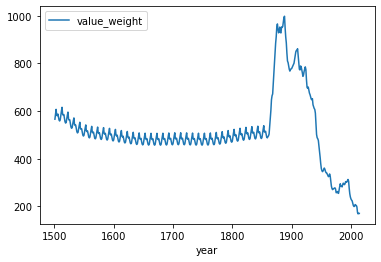

In [21]:
amazon_soil.loc[(amazon_soil['lon']==-62) & (amazon_soil['lat']==0.5)& (amazon_soil['month']=='Jan')&(amazon_soil['stand_age_interval_min']==3000)].plot(x = 'year', y = 'value_weight')

<Axes: xlabel='year'>

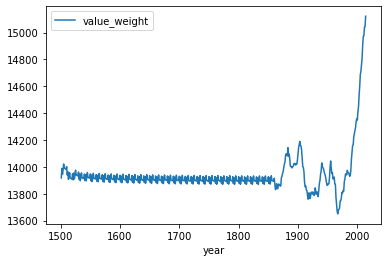

In [19]:
amazon_veg.loc[(amazon_veg['lon']==-61.5) & (amazon_veg['lat']==45)& (amazon_veg['month']=='Jan')&(amazon_veg['stand_age_interval_min']==3000)].plot(x = 'year', y = 'value_weight')

<Axes: xlabel='year'>

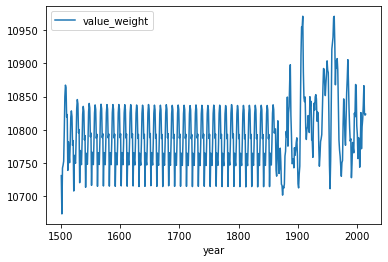

In [20]:
amazon_soil.loc[(amazon_soil['lon']==-61.5) & (amazon_soil['lat']==45)& (amazon_soil['month']=='Jan')&(amazon_soil['stand_age_interval_min']==3000)].plot(x = 'year', y = 'value_weight')

In [17]:
amazon_veg.forest_type.unique()

array(['Tropical Deciduous Forests', 'Tropical Evergreen Forests',
       'Temperate Broadleaved Evergreen Forests',
       'Xeromorphic Forests and Woodlands', 'Tropical Forested Wetlands',
       'Mixed Temperate Forests', 'Boreal Forest', 'Boreal Woodlands',
       'Tropical Forested Floodplains', 'Temperate Coniferous Forests',
       'Forested Boreal Wetlands', 'Temperate Forested Floodplains'],
      dtype=object)

In [18]:
amazon_veg.loc[amazon_veg['forest_type']== 'Temperate Coniferous Forests']

,lon,lat,variable,pft,current_veg,year,month,stand_age_interval_min,cohort_area,land_area,...,temp_weight,value_weight,forest_type,Area,prec,par,tair,nirr,vpr,ws10
2295912,-61.5,45.0,VEGC,forest,9,1501,Apr,3000,1241,1243,...,17185305.95,13847.95,Temperate Coniferous Forests,1243,59.5,121.1,7.1,241.0,7.2,2.2
2295913,-61.5,45.0,VEGC,forest,9,1501,Aug,3000,1241,1243,...,17564667.24,14153.64,Temperate Coniferous Forests,1243,73.5,120.1,19.2,225.5,18.7,2.4
2295914,-61.5,45.0,VEGC,forest,9,1501,Dec,3000,1241,1243,...,17445171.35,14057.35,Temperate Coniferous Forests,1243,103.2,27.2,5.5,44.8,8.1,3.8
2295915,-61.5,45.0,VEGC,forest,9,1501,Feb,3000,1241,1243,...,17213377.37,13870.57,Temperate Coniferous Forests,1243,43.4,55.8,2.4,101.5,6.1,3.5
2295916,-61.5,45.0,VEGC,forest,9,1501,Jan,3000,1241,1243,...,17271642.32,13917.52,Temperate Coniferous Forests,1243,135.8,30.0,2.5,49.0,6.7,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6876883,-60.0,45.5,VEGC,forest,9,2014,Oct,3000,255,262,...,3641236.80,14279.36,Temperate Coniferous Forests,262,284.7,42.0,11.8,66.3,11.9,5.7
6876884,-60.0,45.5,VEGC,forest,9,2014,Sep,30,1,262,...,4.08,4.08,Temperate Coniferous Forests,262,93.5,66.5,14.6,108.0,14.3,5.8
6876885,-60.0,45.5,VEGC,forest,9,2014,Sep,70,1,262,...,4.16,4.16,Temperate Coniferous Forests,262,93.5,66.5,14.6,108.0,14.3,5.8
6876886,-60.0,45.5,VEGC,forest,9,2014,Sep,125,1,262,...,9690.42,9690.42,Temperate Coniferous Forests,262,93.5,66.5,14.6,108.0,14.3,5.8


In [15]:
amazon_veg.loc[(amazon_veg['lon']==-62) & (amazon_veg['lat']==0.5)]

,lon,lat,variable,pft,current_veg,year,month,stand_age_interval_min,cohort_area,land_area,...,temp_weight,value_weight,forest_type,Area,prec,par,tair,nirr,vpr,ws10
0,-62.0,0.5,VEGC,forest,18,1501,Apr,3000,3090,6182,...,5100755.70,1650.730000,Tropical Deciduous Forests,3091,157.4,119.1,28.6,217.5,26.8,0.9
1,-62.0,0.5,VEGC,forest,18,1501,Aug,3000,3090,6182,...,5312822.40,1719.360000,Tropical Deciduous Forests,3091,49.7,135.4,25.9,282.8,24.9,2.3
2,-62.0,0.5,VEGC,forest,18,1501,Dec,3000,3090,6182,...,5291408.70,1712.430000,Tropical Deciduous Forests,3091,0.7,136.1,31.8,289.0,16.2,3.7
3,-62.0,0.5,VEGC,forest,18,1501,Feb,3000,3090,6182,...,5138670.00,1663.000000,Tropical Deciduous Forests,3091,25.4,134.9,31.5,267.6,18.5,2.5
4,-62.0,0.5,VEGC,forest,18,1501,Jan,3000,3090,6182,...,5167839.60,1672.440000,Tropical Deciduous Forests,3091,9.9,137.8,32.5,291.0,16.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,-62.0,0.5,VEGC,forest,18,2014,Sep,90,4,12364,...,3317.97,829.492500,Tropical Deciduous Forests,3091,3.3,142.8,36.9,305.0,17.9,3.5
17612,-62.0,0.5,VEGC,forest,18,2014,Sep,100,2,6182,...,1555.95,777.975000,Tropical Deciduous Forests,3091,3.3,142.8,36.9,305.0,17.9,3.5
17613,-62.0,0.5,VEGC,forest,18,2014,Sep,125,3,9273,...,2124.38,708.126667,Tropical Deciduous Forests,3091,3.3,142.8,36.9,305.0,17.9,3.5
17614,-62.0,0.5,VEGC,forest,18,2014,Sep,150,1,3091,...,649.50,649.500000,Tropical Deciduous Forests,3091,3.3,142.8,36.9,305.0,17.9,3.5


In [ ]:
amazon_soil = pd.read_csv('~/TEM_output_processed/historical_run/forest_lon_lat_pfts/SOILORGC16289.csv')
amazon_veg = pd.read_csv('~/TEM_output_processed/historical_run/forest_lon_lat_pfts/VEGC16289.csv')
amazon_gpp = pd.read_csv('~/TEM_output_processed/historical_run/forest_lon_lat_pfts/GPP16289.csv')
amazon_npp = pd.read_csv('~/TEM_output_processed/historical_run/forest_lon_lat_pfts/NPP16289.csv')